Original Stochastic Differential Equation:

\begin{equation}
dS_t = \mu S_t dt + \sigma S_t dW_t
\end{equation}

Integrated form:

\begin{align*}
- \log S_t &= \log S_0 + \int_{t_0}^{t} \left( \mu - \frac{\sigma^2}{2} \right) ds + \int_{t_0}^{t} \sigma dW_s \\
- \log S_t &= \log S_0 + \left( \mu - \frac{\sigma^2}{2} \right) t + \sigma W_t \\
- \log S_t &\sim \mathcal{N} \left( \log S_0 + \left( \mu - \frac{\sigma^2}{2} \right) t, \sigma^2 t \right)
\end{align*}


Explicit expression:

\begin{equation}
S_t = S_0 e^{\left( \mu - \frac{\sigma^2}{2} \right) t + \sigma W_t}
\end{equation}


In [10]:
import numpy as np
import matplotlib.pyplot as plt
def geometric_brownian_motion(mu, n, T, M, S0, sigma, plot=False):
    dt = T / n
    # simulation using numpy arrays
    St = np.exp(
        (mu - sigma ** 2 / 2) * dt
        + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
    )

    # include array of 1's
    St = np.vstack([np.ones(M), St])

    # multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
    St = S0 * St.cumprod(axis=0)

    if plot:
        # Define time interval correctly 
        time = np.linspace(0,T,n+1)

        # Require numpy array that is the same shape as St
        tt = np.full(shape=(M,n+1), fill_value=time).T

        plt.plot(tt, St)
        plt.xlabel("Years $(t)$")
        plt.ylabel("Stock Price $(S_t)$")
        plt.title(
            f"Realizations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {S0}, \mu = {mu}, \sigma = {sigma}$"
        )
        plt.show()
    return St

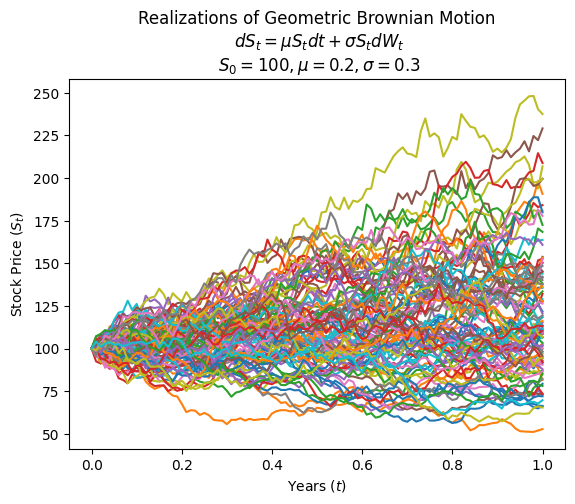

array([[100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ],
       [102.42703509,  98.10933641,  98.56792347, ...,  95.72384891,
         99.11964603, 104.11124089],
       [105.64733722,  98.65846738,  99.53828124, ..., 102.89987132,
        101.69269867, 101.09730095],
       ...,
       [ 88.39111073,  90.43009204, 126.88013361, ..., 139.42546602,
         65.04492614,  68.82253198],
       [ 92.08664224,  89.08213223, 130.76727016, ..., 146.91546646,
         66.14828004,  67.79402151],
       [ 91.51599906,  94.59248443, 133.5325473 , ..., 148.40615727,
         65.41320385,  69.74621782]])

In [16]:
###### Example ######
# Parameters
# drift coefficent
mu = 0.2
# number of steps
n = 100
# time in years
T = 1
# number of sims
M = 100
# initial stock price
S0 = 100
# volatility
sigma = 0.3

geometric_brownian_motion(mu, n, T, M, S0, sigma, plot=True)

Reference:
admin (n.d.). Simulating Geometric Brownian Motion (GBM) in Python – QuantPy. [online] Available at: https://quantpy.com.au/stochastic-calculus/simulating-geometric-brownian-motion-gbm-in-python/.